In [5]:
import numpy as np
import cv2, os

data_path='C:\\Users\\yaici\\OneDrive\\Bureau\\Human Emotion Detection from Images\\CK+48'
data_list=os.listdir(data_path)

img_data=[]

for dataset in data_list:
    img_list=os.listdir(data_path +'/'+ dataset)
    print('loading the image from the folder -{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path+ '/' + dataset +'/'+img)
        input_img_resized=cv2.resize(input_img,(48,48))
        img_data.append(input_img_resized)


data=np.array(img_data)
data=data.astype('float32')    
data=data/255.0
data.shape    


loading the image from the folder -anger

loading the image from the folder -contempt

loading the image from the folder -disgust

loading the image from the folder -fear

loading the image from the folder -happy

loading the image from the folder -sadness

loading the image from the folder -surprise



(981, 48, 48, 3)

preparing the data

In [25]:
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_class = len(data_list)
num_samples = data.shape[0]

# one hot vector
labels = np.ones((num_samples,), dtype='int64')

labels[0:135] = 0  # 135 (anger)
labels[135:189] = 1  # 54 (contempt)
labels[189:366] = 2  # 177 (disgust)
labels[366:441] = 3  # 75 (fear)
labels[441:648] = 4  # 207 (happy)
labels[648:732] = 5  # 84 (sadness)
labels[732:981] = 6  # 249 (surprise)

names = data_list
img_labels = to_categorical(labels, num_classes=num_class)

#shuffle the data
x_img,y_img=shuffle(data,img_labels,random_state=2)

#prepring the data for train & test data
x_train,x_test,y_train,y_test=train_test_split(x_img,y_img,test_size=0.2,random_state=2)


show some samples of images

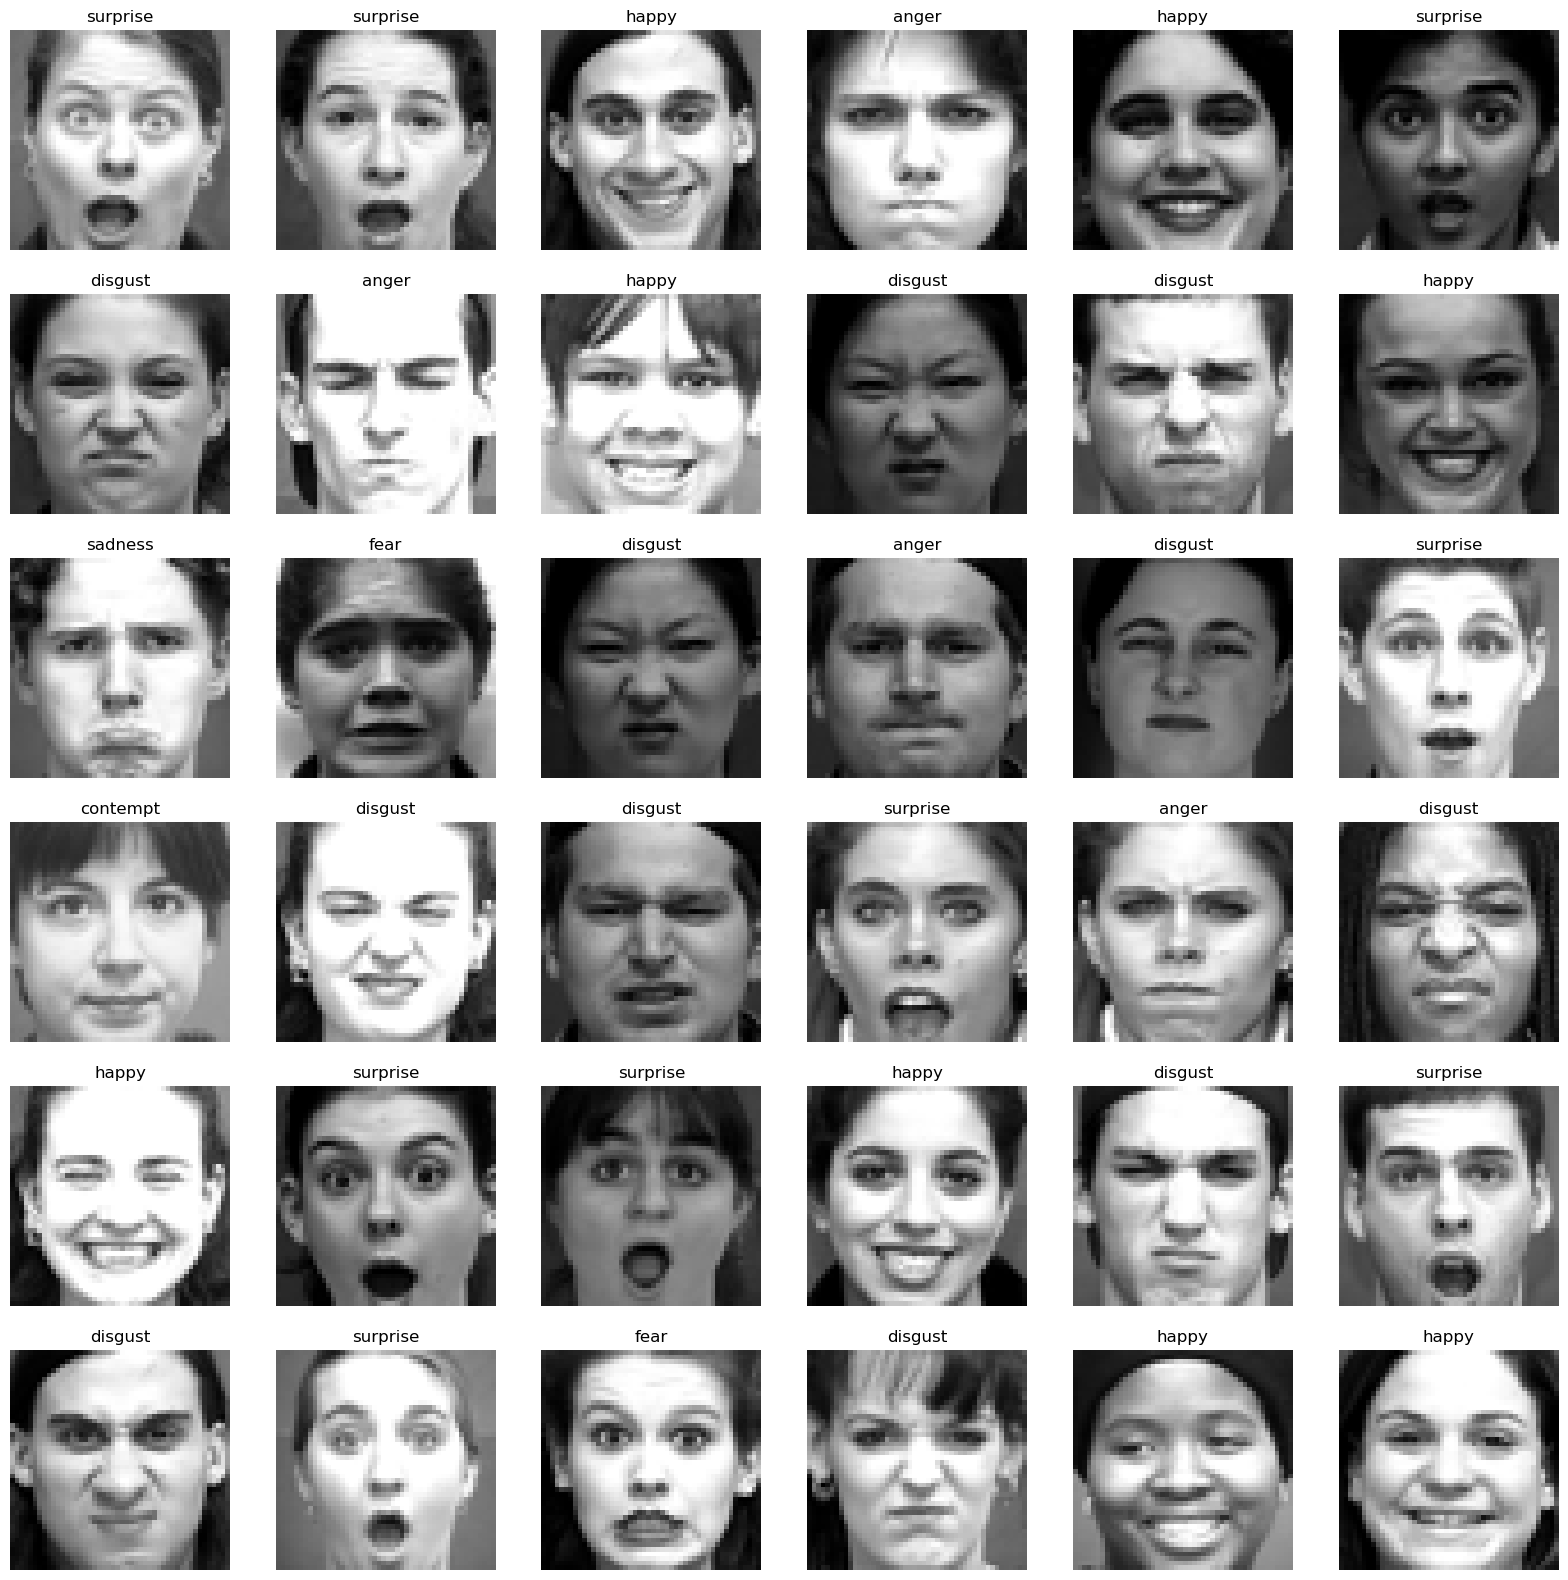

In [27]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(x_img),36))):
    plt.subplot(6,6,i+1)
    plt.imshow(x_img[j])
    plt.axis('off')
    plt.title(names[list(y_img[j].astype(int)).index(1)])


Build the CNN model

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

def create_model():
    input_shape = (48, 48, 3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))

    adam = Adam(learning_rate=0.001)

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    
    return model


create & plot the deep learning model       

In [51]:
model=create_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 48, 48, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 24, 24, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,095 (1.18 MB)

 Trainable params: 308,095 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

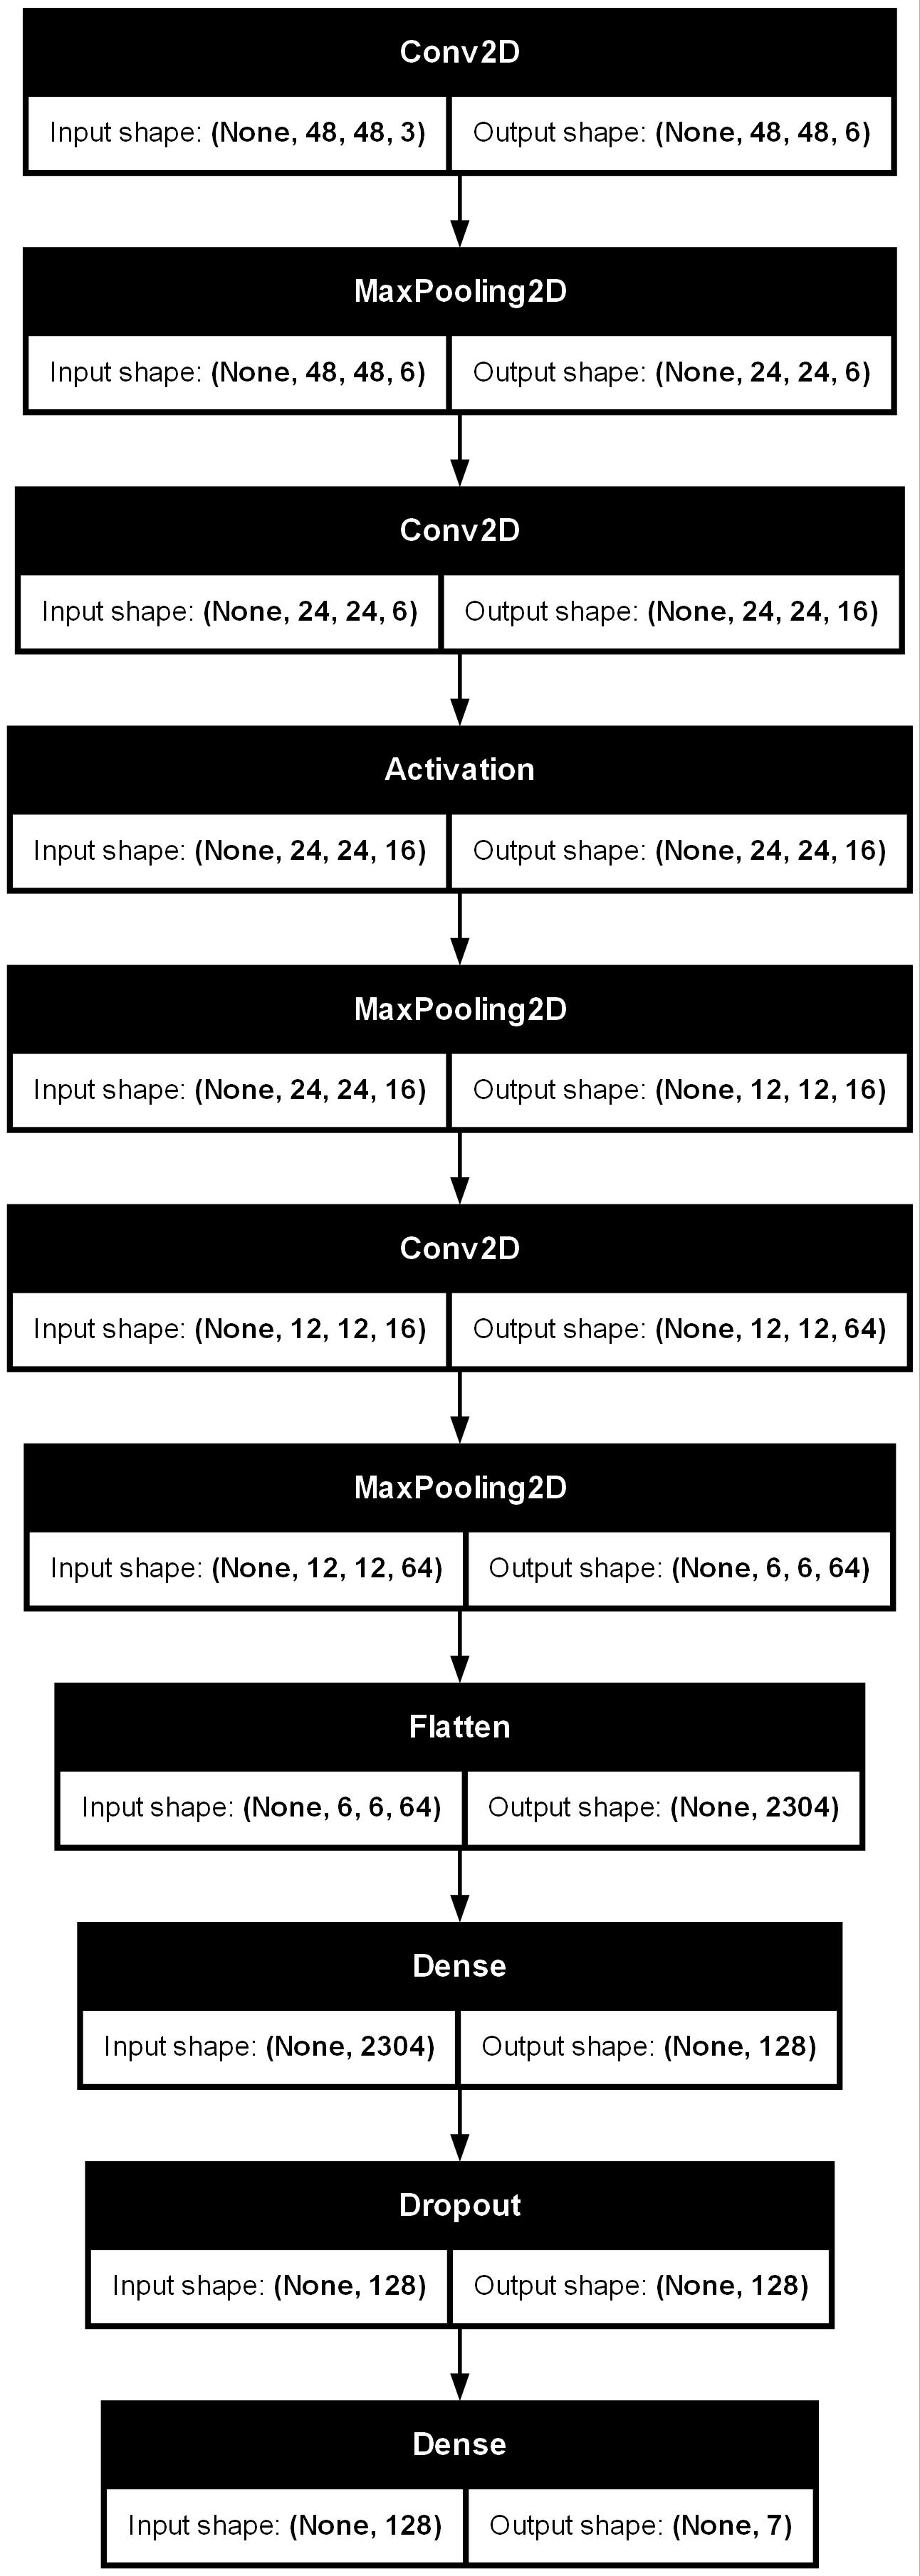

In [58]:
from tensorflow.keras.utils import plot_model

plot_model(model,'my_model.jpg',show_shapes=True)


train the model

In [59]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.1937 - loss: 1.8929 - val_accuracy: 0.4518 - val_loss: 1.7221
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3184 - loss: 1.7761 - val_accuracy: 0.5888 - val_loss: 1.5180
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5124 - loss: 1.4823 - val_accuracy: 0.7056 - val_loss: 1.0682
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5961 - loss: 1.1319 - val_accuracy: 0.7462 - val_loss: 0.9150
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6799 - loss: 0.9218 - val_accuracy: 0.7665 - val_loss: 0.6891
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7137 - loss: 0.7928 - val_accuracy: 0.8579 - val_loss: 0.5382
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7645 - loss: 0.6819 - val_accuracy: 0.8426 - val_loss: 0.4979
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7785 - loss: 0.5893 - val_accuracy: 0.

In [ ]:
testing

the accuracy for testing : 99.492383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
happy


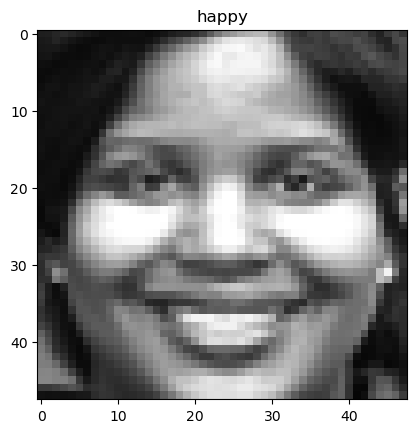

In [61]:
loss,score=model.evaluate(x_test,y_test,verbose=0)
print('the accuracy for testing : %f'% (score*100))
def predict_sample(index):
    y_predict=model.predict(x_test[index:index+1])
    plt.imshow(x_test[index])
    plt.title(names[list(y_predict.astype(int).flatten()).index(1)])

predict_sample(80)
print(names[list(y_test[80]).index(1)])    

<Figure size 640x480 with 0 Axes>

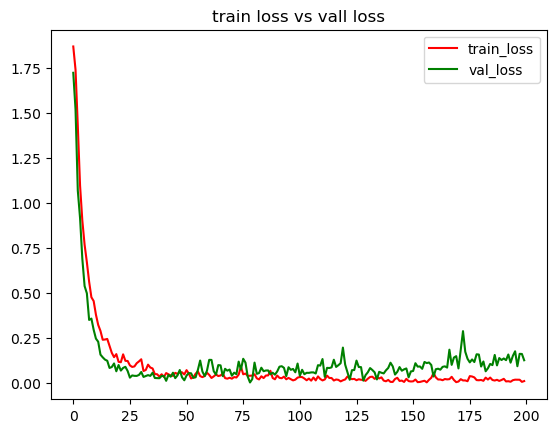

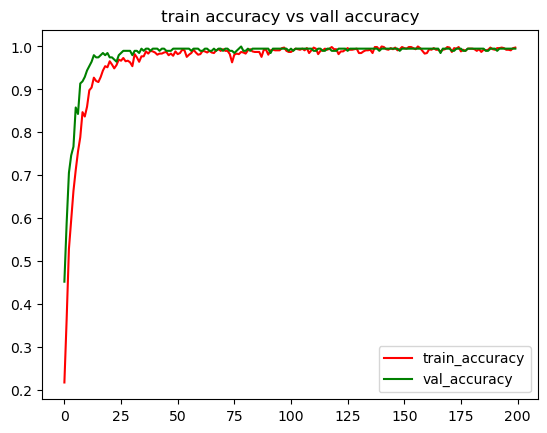

<Figure size 640x480 with 0 Axes>

In [65]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

steps=range(len(train_loss))

plt.plot(steps,train_loss,'r',label='train_loss')
plt.plot(steps,val_loss,'g',label='val_loss')
plt.title('train loss vs vall loss')
plt.legend()
plt.figure()


plt.plot(steps,train_accuracy,'r',label='train_accuracy')
plt.plot(steps,val_accuracy,'g',label='val_accuracy')
plt.title('train accuracy vs vall accuracy')
plt.legend()
plt.figure()
